## Medical Cost Prediction

The aim of this analysis is to predict the medical expense based on the patients'information. The dataset used for this analysis is Insurance dataset from [Kaggle](https://www.kaggle.com/mirichoi0218/insurance). The dataset contains 1338 observations and 7 variables. The variables are as follows:


| Variable | Description |
| --- | --- |
| age | age of primary beneficiary |
|bmi | body mass index |
|children | number of children covered by health insurance |
|smoker | smoking |
|region | the beneficiary's residential area in the US |
|charges | individual medical costs billed by health insurance |

In [123]:
### importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

In [124]:
## Loading the dataset
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data Preprocessing

In [125]:
#shape of my datadet
df.shape

(1338, 7)

In [126]:
## checking information of my dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [127]:
# checking the null value in my dataset
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [128]:
#checking discriptive statistics of my dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [129]:
# checking the duplicate value my datset
df.duplicated().sum()

1

In [130]:
# value count for categorical feature
print(df.sex.value_counts(),"\n")
print(df.smoker.value_counts(),"\n")
print(df.region.value_counts())

male      676
female    662
Name: sex, dtype: int64 

no     1064
yes     274
Name: smoker, dtype: int64 

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


##### Replacing the categorical variables with numerical values.

- sex : 1 - male, 0 - female
- smoker : 1 - yes, 0 - no
- region : 0 - northeast, 1 - northwest, 2 - southeast, 3 - southwest

In [131]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [132]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [133]:
data=["sex","smoker","region"]


In [134]:
for col in data:
    df[col]=label_encoder.fit_transform(df[col])

In [135]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## Exploratory Data Analysis

Visualization of the data is a good way to understand the data. In this section, I will plot the distribution of each variable to get an overview about their counts and distributions.

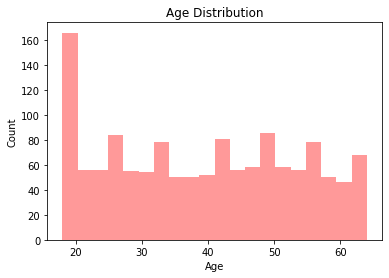

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram for the 'age' column
sns.distplot(df['age'], bins=20, kde=False, color='red')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


Text(0.5, 1.0, 'Gender Distribution')

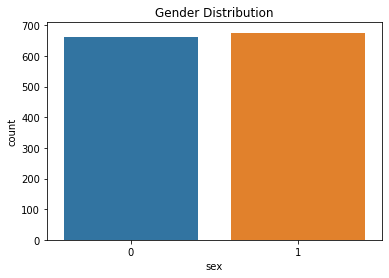

In [137]:
# gender plot
sns.countplot(x="sex",data=df).set_title("Gender Distribution")

In count plot you can see thate male and female have a equal in my dataset

Text(0.5, 1.0, 'BMI Distribution')

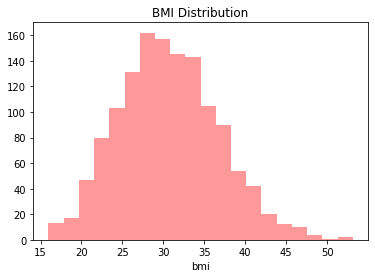

In [138]:
# BMI distribution
sns.distplot(df["bmi"],bins=20,kde=False,color="red").set_title("BMI Distribution")

The majority of the patients have BMI between 25 and 40 which is considered as overweight and could be a major factor in increasing the medical cost

Text(0.5, 1.0, 'Children Distribution')

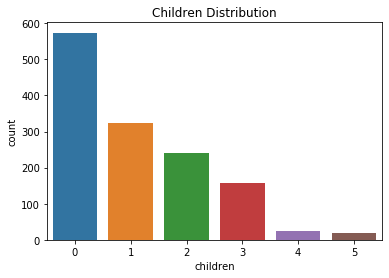

In [139]:
# child count distribution
sns.countplot(x="children",data=df).set_title("Children Distribution")

The graph clearly shows that most of the patients have no children and very few patients have more than 3 children.

Text(0.5, 1.0, 'Region Distribution')

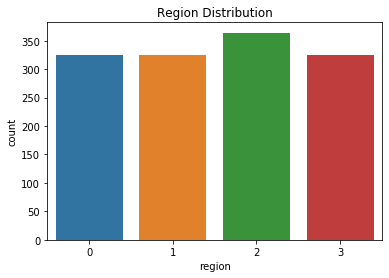

In [140]:
# region count distribution
sns.countplot(x="region",data=df).set_title("Region Distribution")

Text(0.5, 1.0, 'Smoker Count')

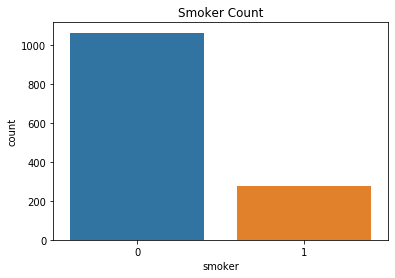

In [141]:
# count plot of smoker
sns.countplot(x="smoker",data=df).set_title("Smoker Count")

smokers are very few in the dataset. Nearly 80% of the patients are non-smokers.

Smoker count with respect to the children count.

Text(0.5, 1.0, 'Smoker Count')

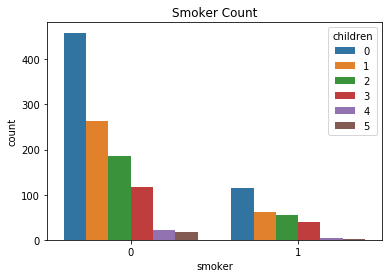

In [142]:
# count plot of smoker
sns.countplot(x="smoker",data=df,hue="children").set_title("Smoker Count")

In [143]:
### Correlation matrix
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


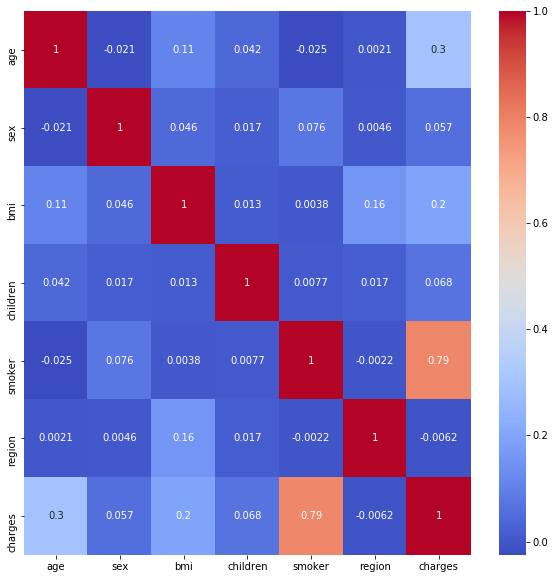

In [144]:
# correlation visualisation with heat map
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

The variable smoker shows a significant coorelation with the medical expenses. Now I will explore more into patients' smoking habits and their relationa with other factors.

#### plotting the smoker count with patient's gender

Text(0.5, 1.0, 'Smoker Count with Gender')

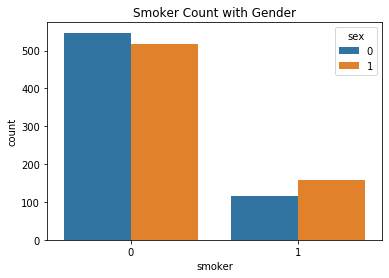

In [145]:
# count plot of smoker
sns.countplot(x="smoker",data=df,hue="sex").set_title("Smoker Count with Gender")

We can notice more male smokers than female smokers. So, I will assume that medical treatment expense for males would be more than females, given the impact of smoking on the medical expenses.

Text(0.5, 1.0, 'violin plot sex vs.Charges')

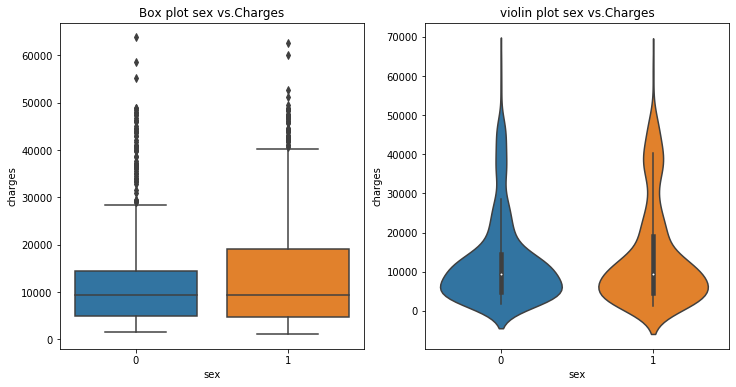

In [146]:
## box plot and violin plot for sex vs charges
fig,ax=plt.subplots(1,2,figsize=(12,6))
sns.boxplot(x="sex",y='charges',data=df,ax=ax[0]).set_title("Box plot sex vs.Charges")
sns.violinplot(x="sex",y="charges",data=df,ax=ax[1]).set_title("violin plot sex vs.Charges")

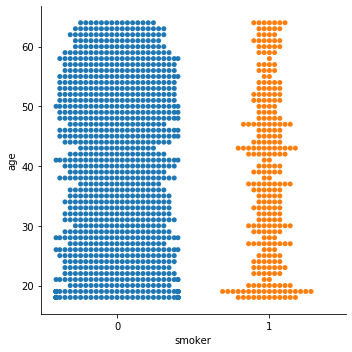

In [147]:
## smoker and age distribution
sns.catplot(x="smoker",y="age",data=df,kind='swarm')

From the graph, we can see that there significant number of smokers of age 19. Now I will study the medical expense of smokers of age 19.

Text(0.5, 1.0, 'Box plot for charges og age 19')

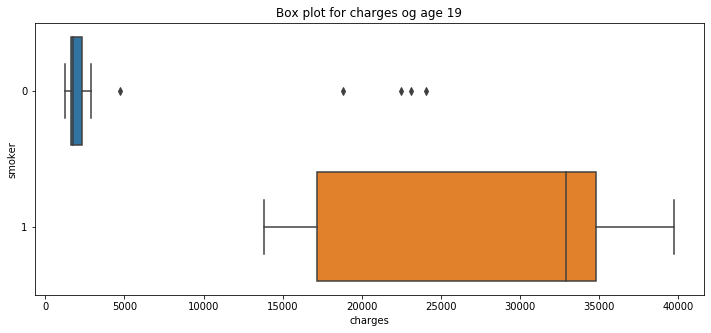

In [148]:
# smoker of age 19
plt.figure(figsize=(12,5))
sns.boxplot(x="charges",y="smoker",data=df[df["age"]==19],orient="h").set_title("Box plot for charges og age 19")

Surprisingly the medical expense of smokers of age 19 is very high in comparison to non smokers. In non smokers we can see some outliners, which may be due to illness or accidents.

It is clear that the medical expense of smokers is higher than that of non-smokers. Now I will plot the charges distribution with repect to patients age of smokers and non-smokers.

Text(0.5, 1.0, 'Scatter plot of non smoker')

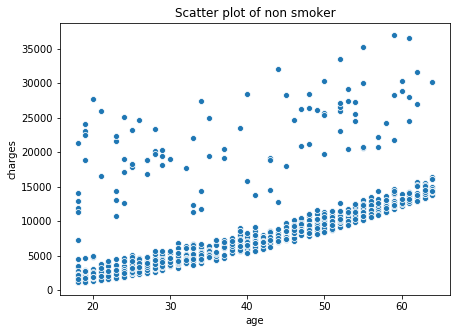

In [149]:
# non smoker charges distribution
plt.figure(figsize=(7,5))
sns.scatterplot(x="age",y="charges",data=df[df['smoker']==0]).set_title("Scatter plot of non smoker")

Majority of the points shows that medical expense increases with age which may be due to the fact that older people are more prone to illness. But there are some outliners which shows that there are other illness or accidents which may increase the medical expense.

Text(0.5, 1.0, 'Scatter plot of non smoker')

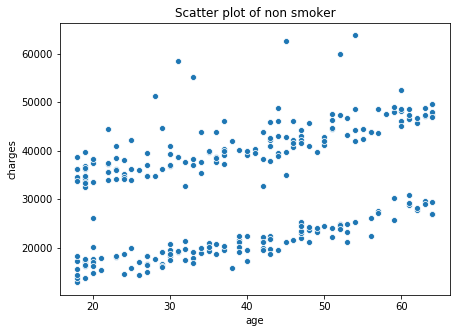

In [150]:
# smoker charges distribution
plt.figure(figsize=(7,5))
sns.scatterplot(x="age",y="charges",data=df[df['smoker']==1]).set_title("Scatter plot of non smoker")

Here we see pecularity in the graph. In the graph there are two segments, one with high medical expense which may be due to smoking related illness and the other with low medical expense which may be due age related illness.

Now, in order to get a more clear picture, I will combine these two graphs.

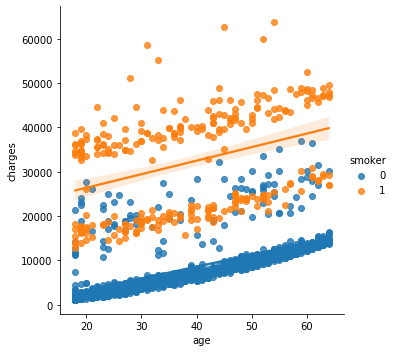

In [151]:
# age charges distribution
sns.lmplot(x="age",y='charges',data=df,hue='smoker')

Now, we clearly understand the variation in charges with respect to age and smoking habits. The medical expense of smokers is higher than that of non-smokers. In non-smokers, the cost of treatment increases with age which is obvious. But in smokers, the cost of treatment is high even for younger patients, which means the smoking patients are spending upon their smoking related illness as well as age related illness.

### Charges distribution for patients with BMI greater than 30 i.e. obese patients

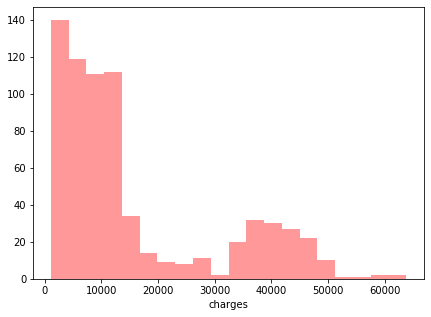

In [152]:
## bmi charges distribution
plt.figure(figsize=(7,5))
sns.distplot(df[df["bmi"]>=30]['charges'],bins=20,kde=False,color="red")

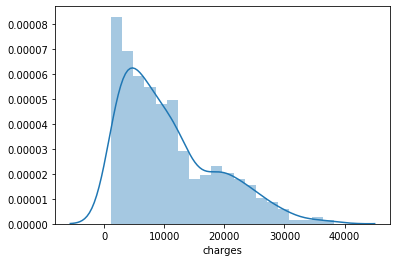

In [153]:
sns.distplot(df[df["bmi"]<30]['charges'],bins=20)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


In [155]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

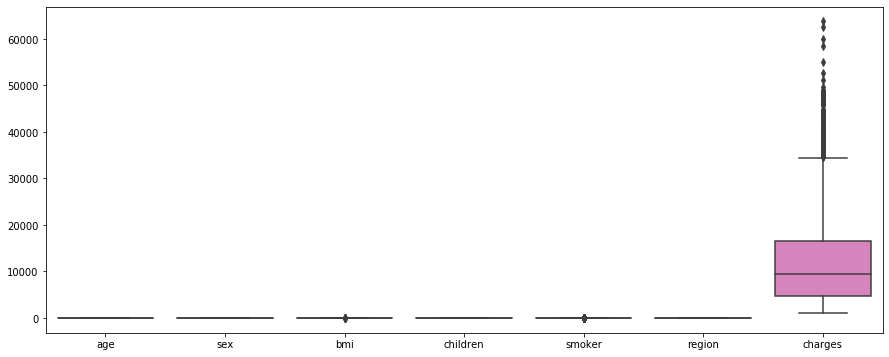

In [156]:
# checking Outlier
num_col=df.select_dtypes(include=["int64","int32","float64"])
plt.figure(figsize=(15,6))
sns.boxplot(data=num_col)

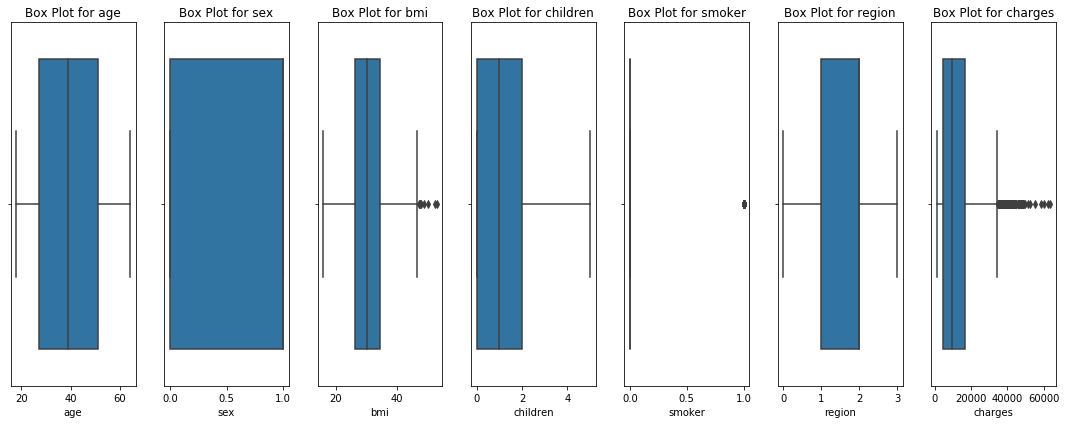

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the numerical columns from your DataFrame
num_col = df.select_dtypes(include=["int64", "int32", "float64"])

# Set the figure size
plt.figure(figsize=(15, 6))

# Create a box plot for each numerical column
for i, col in enumerate(num_col.columns, 1):
    plt.subplot(1, len(num_col.columns), i)
    sns.boxplot(x=num_col[col])
    plt.title(f'Box Plot for {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


In [158]:
"""
# removing outlier
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range
"""

'\n# removing outlier\ndef remove_outlier(col):\n    Q1,Q3=col.quantile([0.25,0.75])\n    IQR=Q3-Q1\n    lower_range=Q1-(1.5*IQR)\n    upper_range=Q3+(1.5*IQR)\n    return lower_range,upper_range\n'

In [159]:
"""for i in df.columns:
    lower_range,upper_range=remove_outlier(df[i])
    df[i]=np.where(df[i]>upper_range,upper_range,df[i])
    df[i]=np.where(df[i]<lower_range,lower_range,df[i])"""

'for i in df.columns:\n    lower_range,upper_range=remove_outlier(df[i])\n    df[i]=np.where(df[i]>upper_range,upper_range,df[i])\n    df[i]=np.where(df[i]<lower_range,lower_range,df[i])'

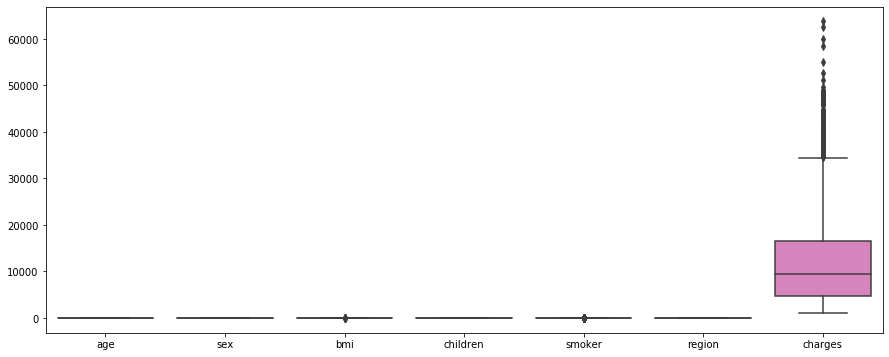

In [160]:
## checking the outlier
num_col=df.select_dtypes(include=["int64","int32","float64"])
plt.figure(figsize=(15,6))
sns.boxplot(data=num_col)

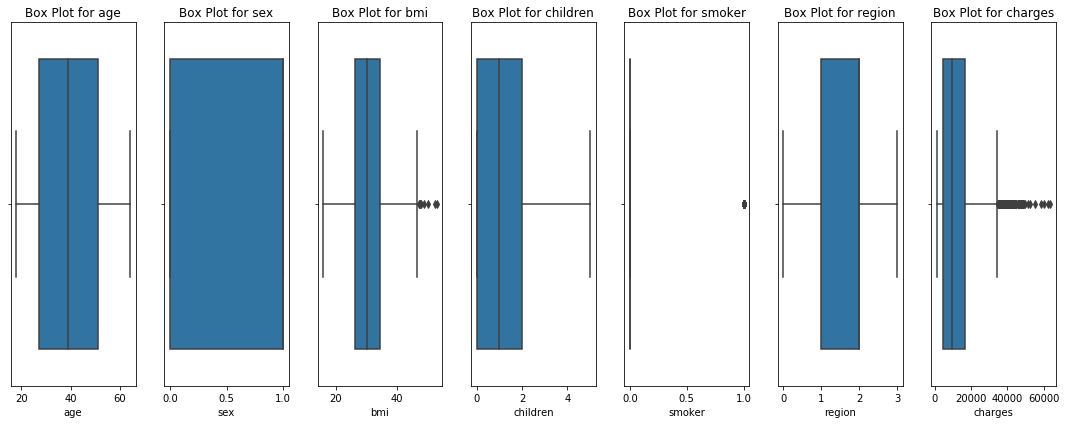

In [161]:
# Select the numerical columns from your DataFrame
num_col = df.select_dtypes(include=["int64", "int32", "float64"])

# Set the figure size
plt.figure(figsize=(15, 6))

# Create a box plot for each numerical column
for i, col in enumerate(num_col.columns, 1):
    plt.subplot(1, len(num_col.columns), i)
    sns.boxplot(x=num_col[col])
    plt.title(f'Box Plot for {col}')
    plt.xlabel(col)

plt.tight_layout()

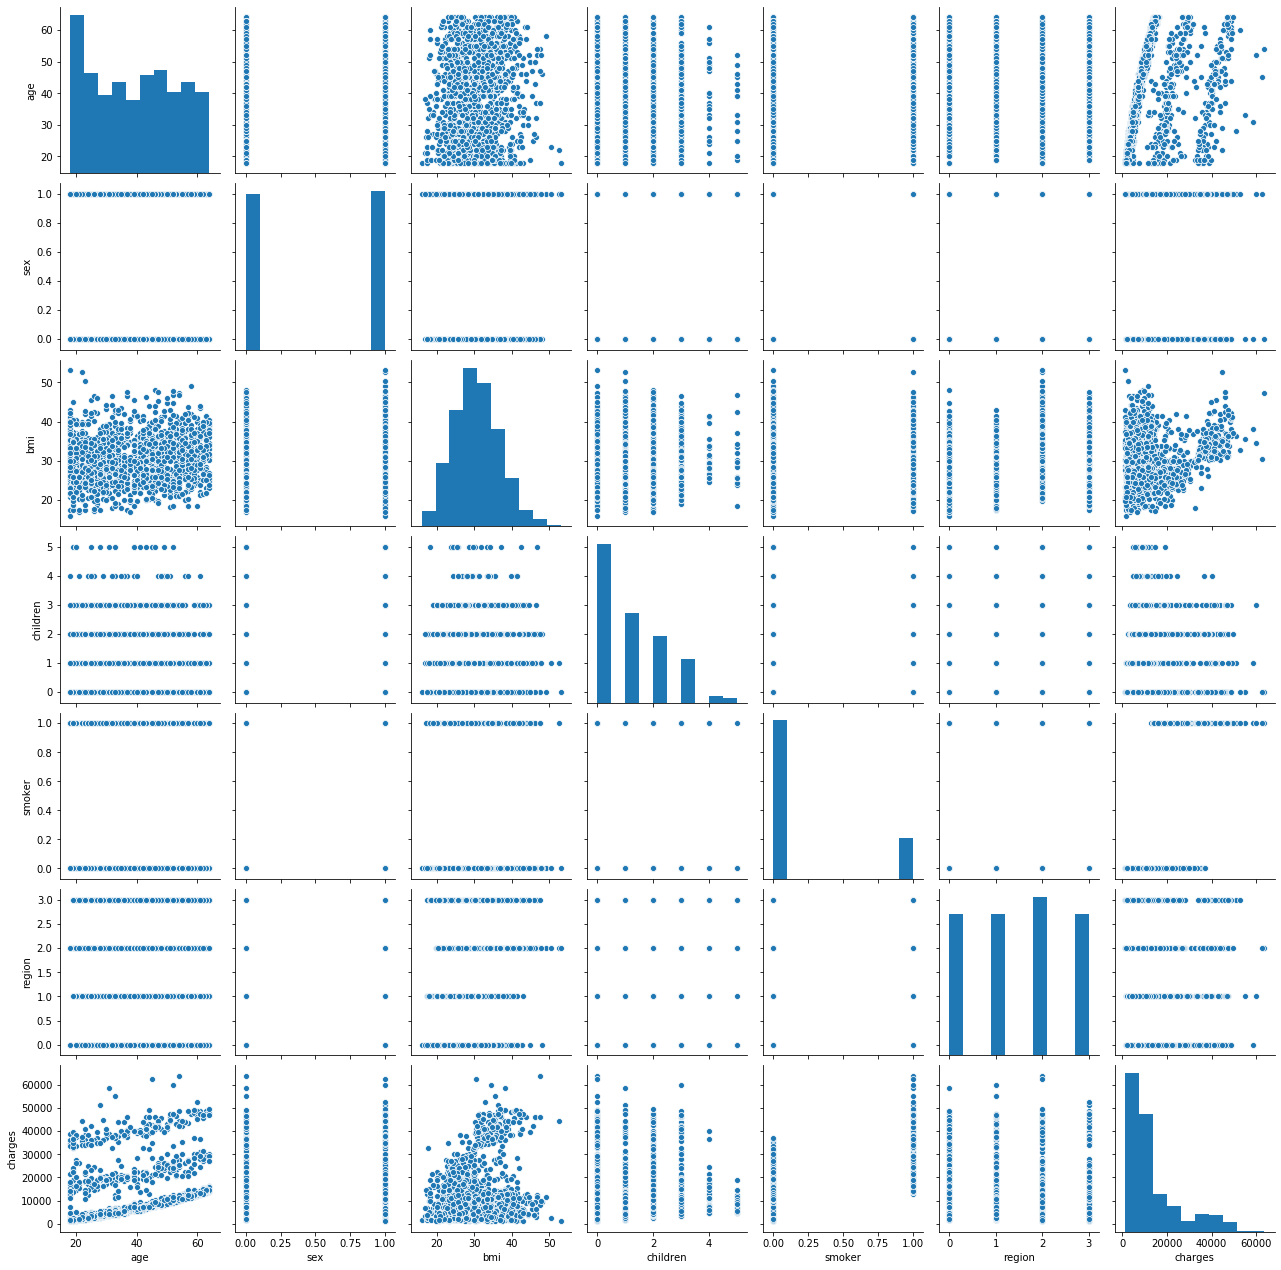

In [162]:
sns.pairplot(data=df)

### splitting the data into the training and testing

In [163]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [164]:
#X=df.iloc[:,:-1]
#y=df.iloc[:,-1]

In [165]:
X=df.drop("charges",axis=1)
y=df["charges"]

In [166]:
# spliting the data into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [167]:
# checking the shape of my dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 6)
(268, 6)
(1070,)
(268,)


In [168]:
## Scalling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [169]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [170]:
X_train.shape

(1070, 6)

In [171]:
X_test.shape

(268, 6)

## Creating an Event Function to give all metrics after model training

In [172]:
# modelling 
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
## Tuning
from sklearn.model_selection import RandomizedSearchCV

In [173]:
def model_evaluate(y_test,y_pred):
    #print(f"-----------------{model_name}-----------------")
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    r2=r2_score(y_test,y_pred)
    n=len(y_test)  #Number of observation
    p=X_train.shape[1] #number of features
    
    adj_r2=1-(1-r2)*(n-1)/(n-p-1)
    return mae,mse,rmse,r2,adj_r2

In [174]:
models={
    "Linear Regression":LinearRegression(),
    "Ridge Regressor":Ridge(),
    "Lasso Regressor":Lasso(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest":RandomForestRegressor()
}
model_list=[]
r2_list=[]
adj_r2_list=[]
for model_name,model in models.items():
    #model=list(models.values())[i]
    model.fit(X_train,y_train) # Train model
    
    #make Predictions
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    
    # Evaluate train And test dataset
    model_train_mae,model_train_mse,model_train_rmse,model_train_r2,model_train_adj_r2=model_evaluate(y_train,y_train_pred)
    model_test_mae,model_test_mse,model_test_rmse,model_test_r2,model_test_adj_r2=model_evaluate(y_test,y_test_pred)
    
    print(model_name)
    model_list.append(model_name)
    
    print("Model performence of training Set")
    print("-Root mean Squared Error: {:.4f}".format(model_train_rmse))
    print("-Mean Squared Error: {:.4f}".format(model_train_mse))
    print("-Mean absolute Error: {:.4f}".format(model_train_mae))
    print("-R2_square: {:.4f}".format(model_train_r2))
    print("-Adj R2 Square: {:.4f}".format(model_train_adj_r2))
    
    print("---------------------------------")
    print("Model performence of testing data")
    print("-Root mean Squared Error: {:.4f}".format(model_test_rmse))
    print("-Mean Squared Error: {:.4f}".format(model_test_mse))
    print("-Mean absolute Error: {:.4f}".format(model_test_mae))
    print("-R2_square: {:.4f}".format(model_test_r2))
    print("-Adj R2 Square: {:.4f}".format(model_test_adj_r2))
    
    r2_list.append(model_test_r2)
    adj_r2_list.append(model_test_adj_r2)
    
    print("\n")

Linear Regression
Model performence of training Set
-Root mean Squared Error: 6105.7893
-Mean Squared Error: 37280663.2226
-Mean absolute Error: 4208.7620
-R2_square: 0.7417
-Adj R2 Square: 0.7402
---------------------------------
Model performence of testing data
-Root mean Squared Error: 5799.5871
-Mean Squared Error: 33635210.4312
-Mean absolute Error: 4186.5089
-R2_square: 0.7833
-Adj R2 Square: 0.7784


Ridge Regressor
Model performence of training Set
-Root mean Squared Error: 6105.7973
-Mean Squared Error: 37280760.5458
-Mean absolute Error: 4209.9182
-R2_square: 0.7417
-Adj R2 Square: 0.7402
---------------------------------
Model performence of testing data
-Root mean Squared Error: 5800.1568
-Mean Squared Error: 33641818.5888
-Mean absolute Error: 4187.9717
-R2_square: 0.7833
-Adj R2 Square: 0.7783


Lasso Regressor
Model performence of training Set
-Root mean Squared Error: 6105.7898
-Mean Squared Error: 37280669.5618
-Mean absolute Error: 4208.6803
-R2_square: 0.7417
-Adj R

In [175]:
from sklearn.model_selection import GridSearchCV

# Define a dictionary for hyperparameters for each model
hyperparameters = {
    "Linear Regression": {},
    "Lasso Regression": {"alpha": [0.01, 0.1, 1.0]},
    "Ridge Regression": {"alpha": [0.01, 0.1, 1.0]},
    "Decision Tree": {"max_depth": [None, 10, 20, 30], "min_samples_split": [2, 5, 10]},
    "Random Forest": {"n_estimators": [100, 200, 300], "max_depth": [None, 10, 20, 30]}
    # Add hyperparameters for each model if needed
}

model_list = []
best_models = {}  # to store the best models

for model_name, model in models.items():
    # Creating the GridSearchCV for the current model with its hyperparameters
    grid_search = GridSearchCV(model, param_grid=hyperparameters.get(model_name, {}), cv=10, scoring="r2")

    # Fit the grid search to the training data
    grid_search.fit(X_train, y_train)

    # Get the best model from the grid search
    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model  # store the best model

    # Make Predictions
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    print(model_name)
    model_list.append(model_name)

    print("Model performence of training Set")
    print("-Root mean Squared Error: {:.4f}".format(model_train_rmse))
    print("-Mean Squared Error: {:.4f}".format(model_train_mse))
    print("-Mean absolute Error: {:.4f}".format(model_train_mae))
    print("-R2_square: {:.4f}".format(model_train_r2))
    print("-Adj R2 Square: {:.4f}".format(model_train_adj_r2))
    
    print("---------------------------------")
    print("Model performence of testing data")
    print("-Root mean Squared Error: {:.4f}".format(model_test_rmse))
    print("-Mean Squared Error: {:.4f}".format(model_test_mse))
    print("-Mean absolute Error: {:.4f}".format(model_test_mae))
    print("-R2_square: {:.4f}".format(model_test_r2))
    print("-Adj R2 Square: {:.4f}".format(model_test_adj_r2))

    print("\n")

    

Linear Regression
Model performence of training Set
-Root mean Squared Error: 1888.6267
-Mean Squared Error: 3566910.8235
-Mean absolute Error: 1047.5648
-R2_square: 0.9753
-Adj R2 Square: 0.9751
---------------------------------
Model performence of testing data
-Root mean Squared Error: 4591.1770
-Mean Squared Error: 21078906.4987
-Mean absolute Error: 2537.2900
-R2_square: 0.8642
-Adj R2 Square: 0.8611


Ridge Regressor
Model performence of training Set
-Root mean Squared Error: 1888.6267
-Mean Squared Error: 3566910.8235
-Mean absolute Error: 1047.5648
-R2_square: 0.9753
-Adj R2 Square: 0.9751
---------------------------------
Model performence of testing data
-Root mean Squared Error: 4591.1770
-Mean Squared Error: 21078906.4987
-Mean absolute Error: 2537.2900
-R2_square: 0.8642
-Adj R2 Square: 0.8611


Lasso Regressor
Model performence of training Set
-Root mean Squared Error: 1888.6267
-Mean Squared Error: 3566910.8235
-Mean absolute Error: 1047.5648
-R2_square: 0.9753
-Adj R2 S

In [176]:
from sklearn.model_selection import GridSearchCV

#Defining the parameter to search
param_grid={
    "max_depth":[None,10,20,30], #maximum depth of the tree
    "min_samples_split":[2,5,10], #minimum number of sample required to an split an internal node
    "min_samples_leaf":[1,2,4] #Minimum number of sample required to be in liaf node
    
}

#creating a Decision tree regression
dt=DecisionTreeRegressor()

# Creating GridSearchCV to search for best hyperparameters
dt_grid_search=GridSearchCV(estimator=dt,param_grid=param_grid,cv=10,n_jobs=1,scoring="r2")

# Fitting the grid search to your tarining data
dt_grid_search.fit(X_train,y_train)

#get the best hyperparameters
best_params=dt_grid_search.best_params_
best_dt=dt_grid_search.best_estimator_

#train the best model
#best_dt=dt.fit(X_train,y_train)

#make a prediction with the best model
y_train_pred_dt=best_dt.predict(X_train)
y_test_pred_dt=best_dt.predict(X_test)

#Evaluate the best model
model_dt_train_mae,model_dt_train_mse,model_dt_train_rmse,model_dt_train_r2,model_dt_train_adj_r2=model_evaluate(y_train,y_train_pred_dt)
model_dt_test_mae,model_dt_test_mse,model_dt_test_rmse,model_dt_test_r2,model_dt_test_adj_r2=model_evaluate(y_test,y_test_pred_dt)

print("Best Decision Tree Regressor Hyperparameter:")
print(best_params)
print("Model performence of training Set")
print("-Root mean Squared Error: {:.4f}".format(model_dt_train_rmse))
print("-Mean Squared Error: {:.4f}".format(model_dt_train_mse))
print("-Mean absolute Error: {:.4f}".format(model_dt_train_mae))
print("-R2_square: {:.4f}".format(model_dt_train_r2))
print("-Adj R2 Square: {:.4f}".format(model_dt_train_adj_r2))
    
print("---------------------------------")
print("Model performence of testing data")
print("-Root mean Squared Error: {:.4f}".format(model_dt_test_rmse))
print("-Mean Squared Error: {:.4f}".format(model_dt_test_mse))
print("-Mean absolute Error: {:.4f}".format(model_dt_test_mae))
print("-R2_square: {:.4f}".format(model_dt_test_r2))
print("-Adj R2 Square: {:.4f}".format(model_dt_test_adj_r2))

Best Decision Tree Regressor Hyperparameter:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Model performence of training Set
-Root mean Squared Error: 3505.2147
-Mean Squared Error: 12286530.3201
-Mean absolute Error: 1826.1036
-R2_square: 0.9149
-Adj R2 Square: 0.9144
---------------------------------
Model performence of testing data
-Root mean Squared Error: 5117.1915
-Mean Squared Error: 26185648.9885
-Mean absolute Error: 2640.4646
-R2_square: 0.8313
-Adj R2 Square: 0.8275


In [177]:
from sklearn.model_selection import GridSearchCV

#Defining the parameter to search
param_grid={
    "max_depth":[None,10,20,30], #maximum depth of the tree
    "min_samples_split":[2,5,10], #minimum number of sample required to an split an internal node
    "min_samples_leaf":[1,2,4] #Minimum number of sample required to be in liaf node
    
}

#creating a Decision tree regression
rf=RandomForestRegressor()

# Creating GridSearchCV to search for best hyperparameters
rf_grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=1,scoring="r2")

# Fitting the grid search to your tarining data
rf_grid_search.fit(X_train,y_train)

#get the best hyperparameters
best_params=rf_grid_search.best_params_
best_rf=rf_grid_search.best_estimator_


#make a prediction with the best model
y_train_pred_rf=best_rf.predict(X_train)
y_test_pred_rf=best_rf.predict(X_test)

#Evaluate the best model
model_rf_train_mae,model_rf_train_mse,model_rf_train_rmse,model_rf_train_r2,model_rf_train_adj_r2=model_evaluate(y_train,y_train_pred_rf)
model_rf_test_mae,model_rf_test_mse,model_rf_test_rmse,model_rf_test_r2,model_rf_test_adj_r2=model_evaluate(y_test,y_test_pred_rf)

print("Best Decision Tree Regressor Hyperparameter:")
print(best_params)
print("Model performence of training Set")
print("-Root mean Squared Error: {:.4f}".format(model_rf_train_rmse))
print("-Mean Squared Error: {:.4f}".format(model_rf_train_mse))
print("-Mean absolute Error: {:.4f}".format(model_rf_train_mae))
print("-R2_square: {:.4f}".format(model_rf_train_r2))
print("-Adj R2 Square: {:.4f}".format(model_rf_train_adj_r2))
    
print("---------------------------------")
print("Model performence of testing data")
print("-Root mean Squared Error: {:.4f}".format(model_rf_test_rmse))
print("-Mean Squared Error: {:.4f}".format(model_rf_test_mse))
print("-Mean absolute Error: {:.4f}".format(model_rf_test_mae))
print("-R2_square: {:.4f}".format(model_rf_test_r2))
print("-Adj R2 Square: {:.4f}".format(model_rf_test_adj_r2))

Best Decision Tree Regressor Hyperparameter:
{'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}
Model performence of training Set
-Root mean Squared Error: 3601.0126
-Mean Squared Error: 12967291.5951
-Mean absolute Error: 1980.3529
-R2_square: 0.9102
-Adj R2 Square: 0.9097
---------------------------------
Model performence of testing data
-Root mean Squared Error: 4348.7340
-Mean Squared Error: 18911487.7969
-Mean absolute Error: 2410.7975
-R2_square: 0.8782
-Adj R2 Square: 0.8754


In [178]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

models={
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
}

for model_name,model in models.items():
    # fit the model on training data
    model.fit(X_train,y_train)
    
    #make a prediction
    y_pred=model.predict(X_test)
    
    #calculate the r2_score
    r2=r2_score(y_test,y_pred)*100
    
    print(f"Accuracy of {model_name} : {r2:.2f}%")

Accuracy of Linear Regression : 78.33%
Accuracy of Lasso : 78.33%
Accuracy of Ridge : 78.33%
Accuracy of Decision Tree : 68.98%
Accuracy of Random Forest Regressor : 86.58%


In [179]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [180]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [181]:
import warnings
warnings.filterwarnings("ignore")

In [182]:
# predicction on the new data
input_data=(19,1,27.90,0,0,3)
#changing the input data into into numpy array
input_data_as_numpy_array=np.array(input_data)
# reshaping the numpy array into 2D  for instance(1,n_features)
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)

## Standardrize the input data
std_data=scaler.transform(input_data_reshape)
print(std_data)

# making the prediction on the basis of best model
prediction=rf_grid_search.predict(std_data)
print("Carges:",set(prediction))


[[-1.44710717  0.97598911 -0.44042221 -0.91119211 -0.50874702  1.33816354]]
Carges: {1349.3953554448753}


## pickling the model for Deployment

In [183]:
import pickle

In [184]:
#save the model
with open("scaler.pkl","wb") as scaler_file:
    pickle.dump(scaler,scaler_file)
    
#serialize and save the rfe(random forest Classifier) object
with open("rf.pkl","wb") as rf_file:
    pickle.dump(rf_grid_search,rf_file)

In [185]:
#Loading the scaler object
with open("scaler.pkl","rb") as scaler_file:
    loaded_scaler=pickle.load(scaler_file)
with open("rf.pkl","rb") as rf_file:
    loaded_rf=pickle.load(rf_file)
    
# predicction on the new data
input_data=(19,1,27.90,0,0,3)
#changing the input data into into numpy array
input_data_as_numpy_array=np.array(input_data)
# reshaping the numpy array into 2D  for instance(1,n_features)
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)

## Standardrize the input data
std_data=scaler.transform(input_data_reshape)
print(std_data)

# making the prediction on the basis of best model
prediction=loaded_rf.predict(std_data)
print("Carges:",set(prediction))

[[-1.44710717  0.97598911 -0.44042221 -0.91119211 -0.50874702  1.33816354]]
Carges: {1349.3953554448753}


In [186]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

# model deploying using streamlit

In [187]:
import numpy as np
import pickle
import streamlit as st

In [194]:
#Loading the scaler object
with open("scaler.pkl","rb") as scaler_file:
    loaded_scaler=pickle.load(scaler_file)

def medical_cost_prediction():
    #load the Randomforest object
    with open("rf.pkl","rb") as rf_file:
        loaded_rf=pockle.load(rf_file)
        
        #changing the input data into into numpy array
    input_data_as_numpy_array=np.array(input_data)
    # reshaping the numpy array into 2D  for instance(1,n_features)
    input_data_reshape=input_data_as_numpy_array.reshape(1,-1)

    ## Standardrize the input data
    std_data=scaler.transform(input_data_reshape)
    print(std_data)

    # making the prediction on the basis of best model
    prediction=loaded_rf.predict(std_data)
    print("Carges:",set(prediction))
    
def main(debug=False):
    #Setting the Title
    st.title(Medical Cost Prediction)
    
    #Getting the input from the user
    age=st.text_input("Age")
    sex=st.text_input("sex")
    bmi=st.text_input("bmi")
    children=st.text_input("Children")
    smoker=st.text_input("smoker")
    region=st.text_input("region")
    
    #code for prediction
    cost=""
    
    #Creating a button for prediction
    if st.button("Medical Cost"):
    
        input_data=[age, sex, bmi, children, smoker, region]
        cost=medical_cost_prediction(input_data)
    
if __name__=="__main__":
    main(debug=True)
    
    

SyntaxError: invalid syntax (<ipython-input-194-fbc634c28d5c>, line 25)

In [193]:
import numpy as np
import pickle
import streamlit as st

# Loading the scaler object
with open("scaler.pkl", "rb") as scaler_file:
    loaded_scaler = pickle.load(scaler_file)

# Loading the RandomForestRegressor object
with open("rf.pkl", "rb") as rf_file:
    loaded_rf = pickle.load(rf_file)

def medical_cost_prediction(input_data):
    # Changing the input data into a numpy array
    input_data_as_numpy_array = np.array(input_data)
    # Reshaping the numpy array into 2D for instance (1, n_features)
    input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

    # Standardize the input data using the loaded scaler
    std_data = loaded_scaler.transform(input_data_reshape)

    # Making the prediction on the basis of the loaded model
    prediction = loaded_rf.predict(std_data)
    return prediction[0]

def main(debug=False):
    # Setting the Title
    st.title("Medical Cost Prediction")
    
    # Getting the input from the user
    age = st.text_input("Age")
    sex = st.text_input("Sex")
    bmi = st.text_input("BMI")
    children = st.text_input("Children")
    smoker = st.text_input("Smoker")
    region = st.text_input("Region")
    
    # Code for prediction
    cost = ""
    
    # Creating a button for prediction
    if st.button("Medical Cost"):
        input_data = [float(age), sex, float(bmi), int(children), smoker, region]
        cost = medical_cost_prediction(input_data)
        st.write("Predicted Medical Cost:", cost)
    
if __name__ == "__main__":
    main(debug=True)
